# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Martin Turrero

Student name: Carmen
    
ID: 2046803

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2046803
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [50 61 67 59 58 64 54 65 63 59]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


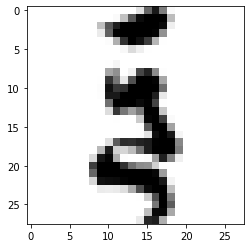

LABEL: 1
INPUT:


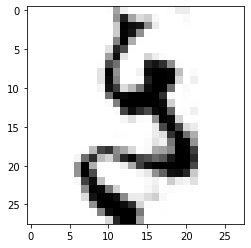

LABEL: 1
INPUT:


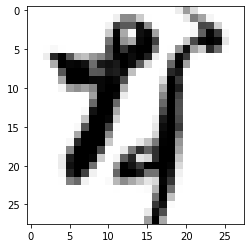

LABEL: 4
INPUT:


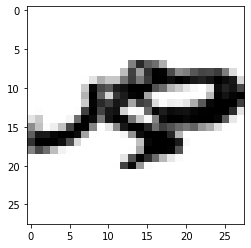

LABEL: 7


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

clf_linear = GridSearchCV(SVC(kernel = 'linear'), parameters, cv = 4)
clf_linear.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf_linear.best_params_)

print("Score with best parameters:", clf_linear.best_score_)

print("All scores on the grid:")
scores_linear = pd.DataFrame(clf_linear.cv_results_).loc[:,['param_C', 'mean_test_score']]
display(scores_linear)

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.01}
Score with best parameters: 0.7366666666666667
All scores on the grid:


,param_C,mean_test_score
0,0.01,0.736667
1,0.1,0.736667
2,1,0.733333
3,10,0.733333


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

clf_poly2 = GridSearchCV(SVC(kernel = 'poly', degree = 2), parameters)
clf_poly2.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", clf_poly2.best_params_)

print("Score with best parameters:", clf_poly2.best_score_)

print("All scores on the grid:")
scores_poly2 = pd.DataFrame(clf_poly2.cv_results_).loc[:,['param_C','param_gamma', 'mean_test_score']]
display(scores_poly2)

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1}
Score with best parameters: 0.7533333333333333
All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.01,0.01,0.111667
1,0.01,0.1,0.741667
2,0.01,1,0.753333
3,0.1,0.01,0.355000
4,0.1,0.1,0.751667
5,0.1,1,0.753333
6,1,0.01,0.741667
7,1,0.1,0.753333
8,1,1,0.753333


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel

clf_poly3 = GridSearchCV(SVC(kernel = 'poly', degree = 3), parameters)
clf_poly3.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=3 KERNEL')

print("Best parameters set found:", clf_poly3.best_params_)

print("Score with best parameters:", clf_poly3.best_score_)

print("All scores on the grid:")
scores_poly3 = pd.DataFrame(clf_poly3.cv_results_).loc[:,['param_C','param_gamma', 'mean_test_score']]
display(scores_poly3)

RESULTS FOR POLY DEGREE=3 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7150000000000001
All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.01,0.01,0.111667
1,0.01,0.1,0.715000
2,0.01,1,0.681667
3,0.1,0.01,0.288333
4,0.1,0.1,0.690000
5,0.1,1,0.681667
6,1,0.01,0.683333
7,1,0.1,0.681667
8,1,1,0.681667


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
clf_rbf = GridSearchCV(SVC(kernel = 'rbf'), parameters)
clf_rbf.fit(X_train, y_train)

print ('RESULTS FOR RBF KERNEL')

print("Best parameters set found:", clf_rbf.best_params_)

print("Score with best parameters:", clf_rbf.best_score_)

print("All scores on the grid:")
scores_rbf = pd.DataFrame(clf_rbf.cv_results_).loc[:,['param_C','param_gamma', 'mean_test_score']]
display(scores_rbf)

RESULTS FOR RBF KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.7983333333333335
All scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.1,0.001,0.111667
1,0.1,0.01,0.226667
2,0.1,0.1,0.111667
3,0.1,1,0.111667
4,1,0.001,0.626667
5,1,0.01,0.780000
6,1,0.1,0.181667
7,1,1,0.111667
8,10,0.001,0.743333
9,10,0.01,0.798333


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

**ANSWER:** The accuracy increases from linear to polynomial and finally to RBF. Moreover, linear and polynomial kernels have the same best parameter (C = 0.01), while the RBFs kernel best parameter C is much higher (C = 10). Incresasing the degree of the polynomial doesn't imply a better outcome as we can see.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01)
best_SVM.fit(X_train, y_train)

training_error = 1 - clf_rbf.best_score_  # (error is 1 - svm.score)
test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.201667
Best SVM test error: 0.172750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


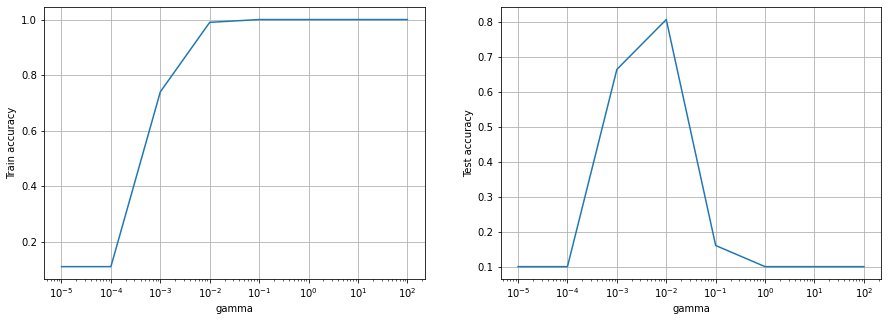

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []
    
for g in gamma_values:
    clf_rbf = SVC(kernel = 'rbf', C = 1, gamma = g)
    clf_rbf.fit(X_train, y_train)
    train_acc_list.append(clf_rbf.score(X_train,y_train))
    test_acc_list.append(clf_rbf.score(X_test,y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

**ANSWER:** We can see how training error decreases with gamma until we get to a point in which it is equal to zero. In that same point, the test error - which had followed the same pattern until than-, sarts being very big and the test accuracy is completely lost. We can relate this behavior with overfitting. This occurs when a model learns training data with too much detail, learning its noise and random fluctuations. As a consequence, it is no longer valuable because these concepts do not appear in the test set and the model is not able to identify the samples.

We can see from the plot that the best gamma value is 0.01.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [210 233 191 192 198 201 188 185 188 214]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

best_SVM.fit(X_train, y_train)

training_error = 1 - best_SVM.score(X_train,y_train) 

test_error = 1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.115276


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C = 10**6)
logreg.fit(X_train, y_train)

training_error = 1. - logreg.score(X_train,y_train)
test_error = 1. - logreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.279534


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

training_error = 1. - logreg.score(X_train,y_train)
test_error = 1. - logreg.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

C:\Users\cmart\anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best regularized logistic regression training error: 0.001000
Best regularized logistic regression test error: 0.255724


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.

**ANSWER:** The result of SVM using more training samples is better than the one using only 600. In fact, the later one has an error of 17.3%, while the error of the SVM with 2000 training data points is 11.5%. 

- the results of SVM and of Logistic Regression

**ANSWER:** Looking at the results, we can see that SVM model is much more accurate then Logistic Regression in this case. The error of SVM as we said before is of 11.5% while, for the same number of samples, Logistic Regression provides an error of 25.6%.


## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


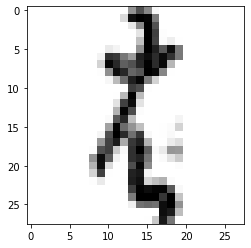

LABEL: 5
Logistic regression classification: 6
SVM classification: 5


In [19]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

for i in range(len(y_test)):
    if LR_prediction[i] != y_test[i] and SVM_prediction[i] == y_test[i]:
        plot_input(X_test,y_test,i)
        print("Logistic regression classification:", LR_prediction[i])
        print("SVM classification:", SVM_prediction[i])
        break


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5790 5767 5809 5808 5802 5799 5812 5815 5812 5786]

 Confusion matrix SVM  
 
 [[5399    5    5   42   99   58    5   95   47   35]
 [  20 5057  126   42  124   19  157    6  105  111]
 [   0  142 4838   60   87   29  313   18  196  126]
 [   7   92  207 5250   41   61   20   39   69   22]
 [ 157  108  125   56 5025   15   86   41   90   99]
 [  43   47  181  171   39 5137   75   19   70   17]
 [  19  117  320   63  211    8 4848  120   52   54]
 [  52   18   66   66  164   23   35 5263   59   69]
 [  59  121   98   42   22   54  136    3 5255   22]
 [  30  166  114   19  115    9   13   18   60 5242]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.01 0.02 0.01 0.   0.02 0.01 0.01]
 [0.   0.88 0.02 0.01 0.02 0.   0.03 0.   0.02 0.02]
 [0.   0.02 0.83 0.01 0.01 0.   0.05 0.   0.03 0.02]
 [0.   0.02 0.04 0.9  0.01 0.01 0.   0.01 0.01 0.  ]
 [0.03 0.02 0.02 0.01 0.87 0.   0.01 0.01 0.02 0.02]
 [0.01 0.01 0.03 0.03 0.01 0.89 0.01 0.   0.0

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

**ANSWER:** By looking at the confusion matrices we can see clearly that SVM has a higher accuracy than Logistic Regression. The fact that some accuracies are lower than others might be beacuse an error in featuring is being made with one particular character, or because that character is being mistaken with anotherone some of the times. We can see that in both confusion matrices the lowest accuracy is for the third character (す) which can also mean that the samples corresponding to す are more difficult to classify and distinguish then the others.